<a href="https://colab.research.google.com/github/bipinthecoder/student-scores-data-analysis/blob/main/student_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset_path = '/content/drive/MyDrive/Itza Media/student-scores.csv'

In [82]:
df = pd.read_csv(dataset_path, index_col='id') #Reading the dataset csv file

**Aim**: To identify the students with least performance among students and identify interesting insishts from the dataset, such that a targeted video course or a tailored chat assistant can be introduced to help the students in those subjects

**-----------Data Understanding----------------**

The dataset has information about the performance of senior students in a high school at the end of their final semester.


In [83]:
df.head()

,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
id,,,,,,,,,,,,,,,,
1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [6]:
df.shape

(2000, 16)

The dataset has 2000 entries with 16 different features

In [7]:
columns = df.columns
print(columns)

Index(['first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score'],
      dtype='object')


The dataset has 2000 entries of students and 16 features representing their personal details like name, email, gender and performance details like Maths Score, Physics Score etc.

**----------Exploratory Data Analysis------------**

**Checking for missing fields in the data for data cleaning**

In [10]:
missing_values = df.isna()

missing_count = df.isna().sum() #Getting the sum of missing data
print(f'Missing Count: {missing_count}')

Missing Count: first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


It is clear from the above summary that the dataset does not have any null/*missing* values

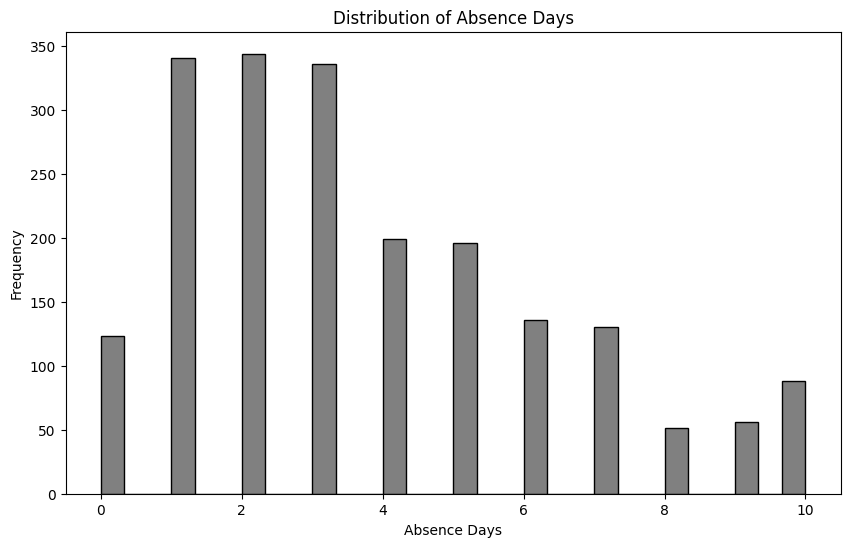

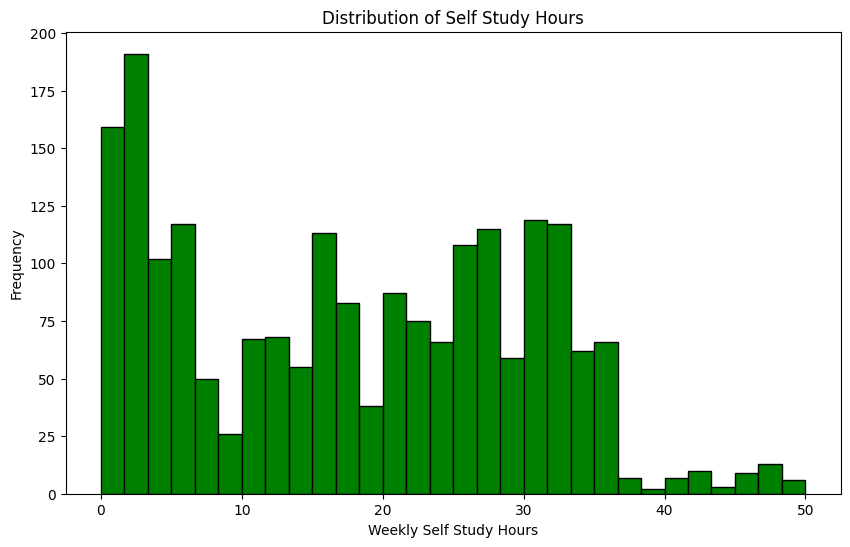

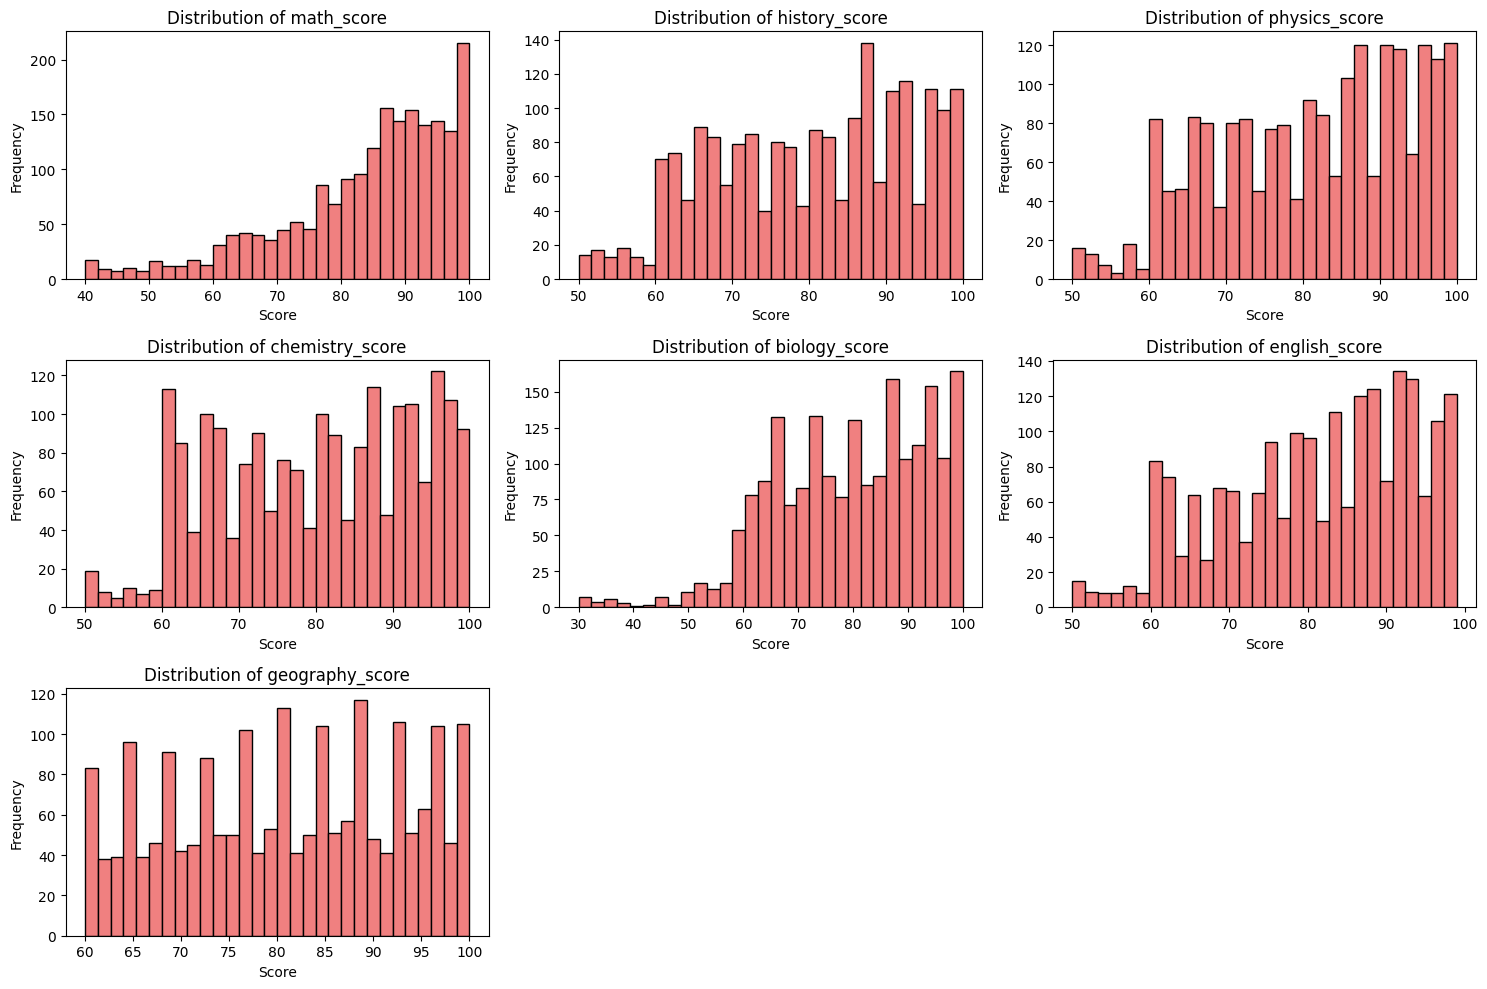

In [31]:
# Histogram for Absence Days
plt.figure(figsize=(10, 6))
plt.hist(df['absence_days'], bins=30, color='grey', edgecolor='black')
plt.title('Distribution of Absence Days')
plt.xlabel('Absence Days')
plt.ylabel('Frequency')
plt.show()


# Histogram for weekly_self_study_hours
plt.figure(figsize=(10, 6))
plt.hist(df['weekly_self_study_hours'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Self Study Hours')
plt.xlabel('Weekly Self Study Hours')
plt.ylabel('Frequency')
plt.show()

#Histograms for all the score columns
score_columns = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']
plt.figure(figsize=(15, 10))
for i, column in enumerate(score_columns, start=1):
    plt.subplot(3, 3, i)  # Adds a subplot in a 3x3 grid
    plt.hist(df[column], bins=30, color='lightcoral', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



*   **The Absence Days Histogram**: The plot shows that majority of the absences were between 2 and 4 days, however some larger absence days can also be found towards the tail of the histogram
*   **The Weekly Self Study Hours Histogram**: It can be seen that majority of the students spend less than 35 hours per week on self study. However, there are a couple of instances were some students spent more than 40 hours and more on self study
*   **Histograms on Scores**: All the score histogram shows a positive skeweness indicating a general positive performance among the students. However, there are some instances with low scores among the students.







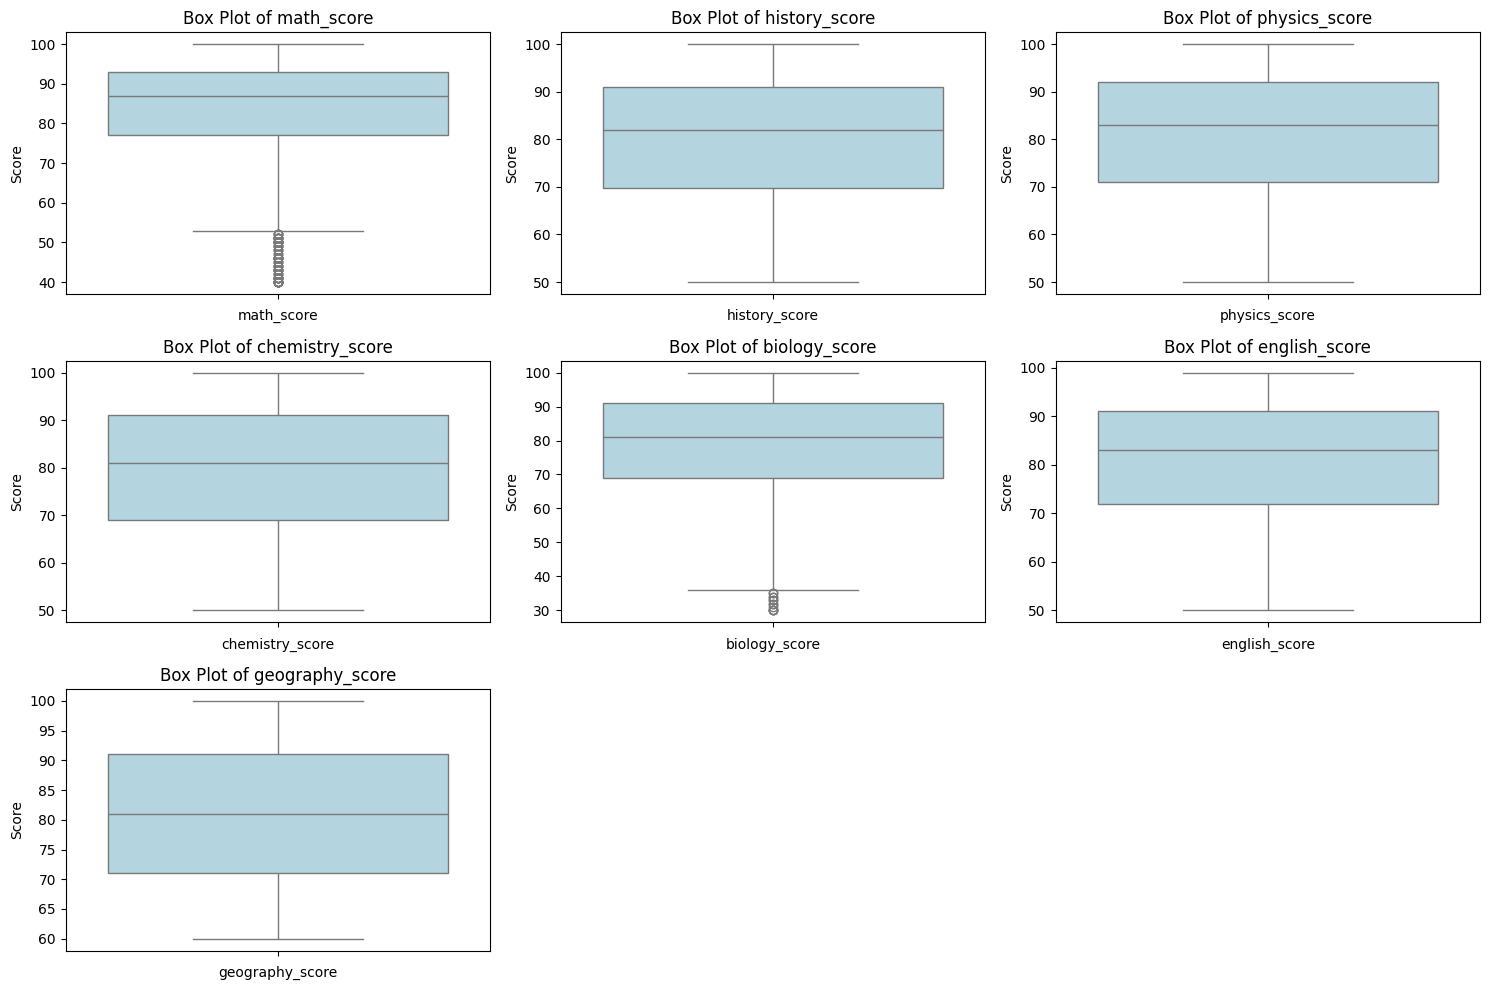

In [32]:
# Box Plots for Scores
plt.figure(figsize=(15, 10))
for i, column in enumerate(score_columns, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color='lightblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Score')
plt.tight_layout()
plt.show()

From the Box plots, we can see that for the subjects Maths and Biology, there exists some data points below the lower bound. This can be an outlier case which is of interest to the objective of this data analysis. Hence calculating the outliers for the columns: math_score, biology_score

**---Descriptive Statistics-----**

In [54]:
df.describe()

,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [48]:
def return_outliers_for_a_column(data_drame, column_name):

  Q1 = data_drame[column_name].quantile(0.25)
  Q3 = data_drame[column_name].quantile(0.75)

  IQR = Q3 - Q1 #Calculating the Inter Quartile Range

  lower_bound = Q1 - 1.5 * IQR
  outliers = data_drame[(df[column_name] < lower_bound)]

  return outliers


In [49]:
maths_outliers = return_outliers_for_a_column(df, 'math_score')
biology_outliers = return_outliers_for_a_column(df, 'biology_score')

In [50]:
print(maths_outliers.shape)

(70, 16)


In [51]:
print(maths_outliers['career_aspiration'].unique())

['Business Owner' 'Real Estate Developer']


In [52]:
print(biology_outliers.shape)

(13, 16)


In [53]:
print(biology_outliers['career_aspiration'].unique())

['Accountant']


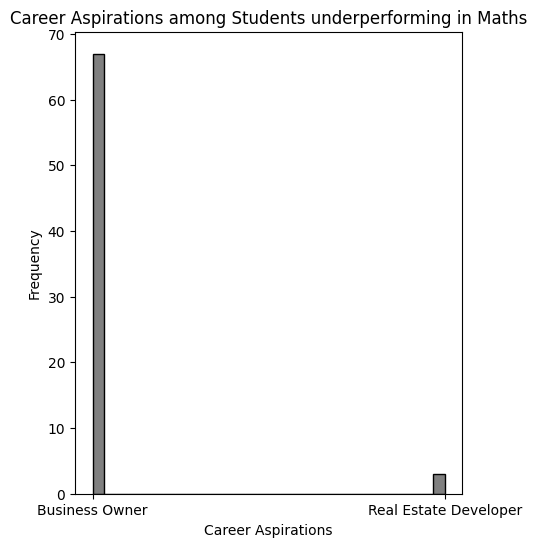

In [57]:
plt.figure(figsize=(5, 6))
plt.hist(maths_outliers['career_aspiration'], bins=30, color='grey', edgecolor='black')
plt.title('Career Aspirations among Students underperforming in Maths')
plt.xlabel('Career Aspirations')
plt.ylabel('Frequency')
plt.show()

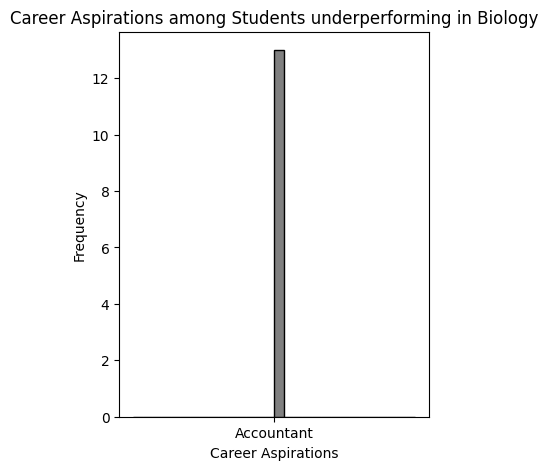

In [59]:
plt.figure(figsize=(4, 5))
plt.hist(biology_outliers['career_aspiration'], bins=30, color='grey', edgecolor='black')
plt.title('Career Aspirations among Students underperforming in Biology')
plt.xlabel('Career Aspirations')
plt.ylabel('Frequency')
plt.show()

**Correlation Calculations**

In [84]:
#Checking the correlation between Biology Score and Math Score
correlation_maths_biology = df['biology_score'].corr(df['math_score'])
correlation_maths_biology

0.08129805625725961

In [85]:
#Checking the correlation between Math Score and Weekly Self Study Hours
correlation_self_study_math = df['math_score'].corr(df['weekly_self_study_hours'])
correlation_self_study_math

0.3935692982498627

In [86]:
#Checking the correlation between Biology Score and Weekly Self Study Hours
correlation_self_study_biology = df['biology_score'].corr(df['weekly_self_study_hours'])
correlation_self_study_biology

0.1904808233373612

A correlation value of 0.08 indicates no particular linar relationship between the Maths and Biology scores. Similarly, there are no stronger correlation between Math score, Biology score and Self study hours done weekly

In [87]:
#Extracting the numerical columns for checking correlation
df_only_numerical = df.drop(columns=['first_name','last_name','email', 'gender', 'career_aspiration'], axis=1)

In [70]:
df_only_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   part_time_job               2000 non-null   bool 
 1   absence_days                2000 non-null   int64
 2   extracurricular_activities  2000 non-null   bool 
 3   weekly_self_study_hours     2000 non-null   int64
 4   math_score                  2000 non-null   int64
 5   history_score               2000 non-null   int64
 6   physics_score               2000 non-null   int64
 7   chemistry_score             2000 non-null   int64
 8   biology_score               2000 non-null   int64
 9   english_score               2000 non-null   int64
 10  geography_score             2000 non-null   int64
dtypes: bool(2), int64(9)
memory usage: 224.7 KB


**Plotting Correlation Map**

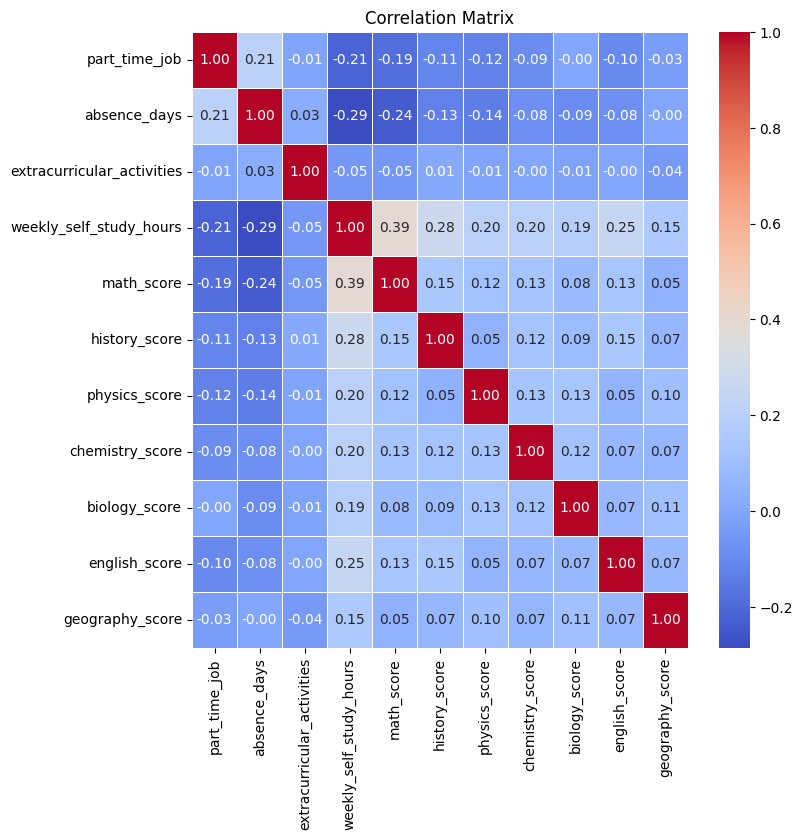

In [74]:
# Ref:: https://seaborn.pydata.org/generated/seaborn.heatmap.html

plt.figure(figsize=(8, 8))
sns.heatmap(df_only_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


**Combining underperforming student details**

In [ ]:
#Filtering relevant features to merge together
biology_filtered = biology_outliers[['first_name', 'last_name', 'email']]


#setting biology field as True and maths field as False for future use.
biology_filtered['is_biology'] = True
biology_filtered['is_maths'] = False


maths_filtered = maths_outliers[['first_name', 'last_name', 'email']]
maths_filtered['is_biology'] = False
maths_filtered['is_maths'] = True

In [78]:
#Merging both Maths and Biology student details
merged_df = pd.concat([biology_filtered, maths_filtered]).drop_duplicates().reset_index(drop=True)

In [79]:
merged_df.head()

,first_name,last_name,email,is_biology,is_maths
0,Carol,Hill,carol.hill.30@gslingacademy.com,True,False
1,Sonia,Noble,sonia.noble.50@gslingacademy.com,True,False
2,Patrick,Parker,patrick.parker.91@gslingacademy.com,True,False
3,Christopher,Cohen,christopher.cohen.246@gslingacademy.com,True,False
4,Jasmine,Clark,jasmine.clark.423@gslingacademy.com,True,False


In [80]:
merged_df.tail()

,first_name,last_name,email,is_biology,is_maths
78,Catherine,Coffey,catherine.coffey.1888@gslingacademy.com,False,True
79,Patricia,Douglas,patricia.douglas.1892@gslingacademy.com,False,True
80,Alexis,Byrd,alexis.byrd.1895@gslingacademy.com,False,True
81,Gregory,Cole,gregory.cole.1915@gslingacademy.com,False,True
82,Brittany,Compton,brittany.compton.1999@gslingacademy.com,False,True


In [81]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  83 non-null     object
 1   last_name   83 non-null     object
 2   email       83 non-null     object
 3   is_biology  83 non-null     bool  
 4   is_maths    83 non-null     bool  
dtypes: bool(2), object(3)
memory usage: 2.2+ KB


Note:

Some non-features were not encoded using any techniques like One-Hot encoding and some features were not removed from the dataframe because no predictive modelling was performed in this analysis. However, as an extended step, in future these steps has to be taken care.